In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa
from pandas import datetime

In [4]:
def parser(x):
    return datetime.strptime(x, '%d-%m-%Y')

RRS = pd.read_csv('RR_sales.csv', parse_dates=[0], date_parser = parser, index_col = 0)
RRS.head()

,RR_sales
Date,
1996-01-15,134926
1996-02-15,136781
1996-03-15,137527
1996-04-15,137504
1996-05-15,138302


In [5]:
def parser(x):
    return datetime.strptime(x, '%d-%m-%Y')

PDI = pd.read_csv('PDI.csv', parse_dates=[0], date_parser = parser, index_col = 0)
PDI.head()

,PDI
Date,
1996-01-15,5660.0
1996-02-15,5712.9
1996-03-15,5748.8
1996-04-15,5732.7
1996-05-15,5816.0


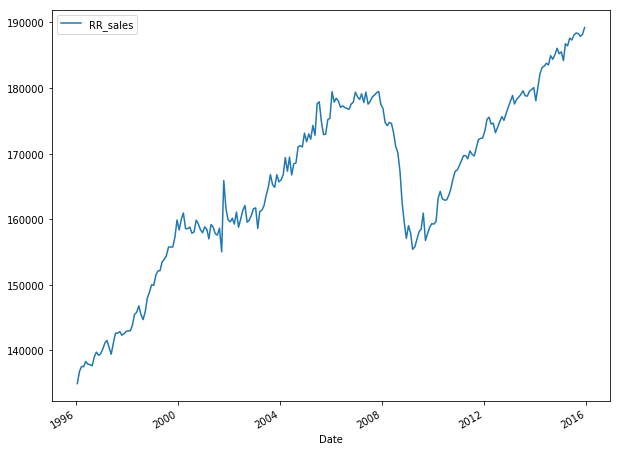

In [6]:
RRS.plot(figsize = (10, 8))

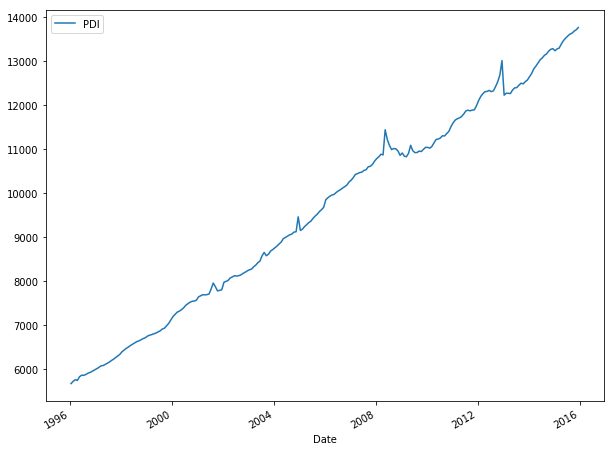

In [7]:
PDI.plot(figsize = (10, 8))

In [8]:
from statsmodels.tsa.arima_model import ARIMA

In [10]:
X1 = RRS.values
train1 = X1[0:157]
test1 = X1[157:]

In [11]:
train1.size

157

In [12]:
test1.size

83

In [13]:
X2 = PDI.values
train2 = X2[0:157]
test2 = X2[157:]

In [14]:
model_arimaRRS = ARIMA(train1, order=(1, 1, 1))
model_arima_fit = model_arimaRRS.fit()

In [15]:
model_arimaPDI = ARIMA(train2, order=(1, 1, 1))
model_arima_fit = model_arimaPDI.fit()

In [16]:
predictions1 = model_arima_fit.forecast(steps = 83)[0]
predictions2 = model_arima_fit.forecast(steps = 83)[0]

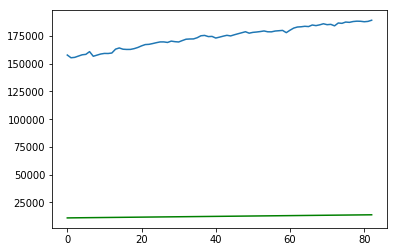

In [18]:
plt.plot(test1)
plt.plot(predictions1, color = 'green')


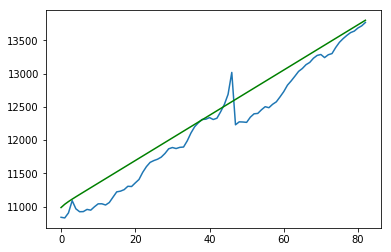

In [19]:
plt.plot(test2)
plt.plot(predictions2, color = 'green')

In [21]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [22]:
Arima_RMSE_RRS = sqrt(mean_squared_error(test1, predictions1))
print(Arima_RMSE_RRS)

161795.773840366


In [23]:
Arima_RMSE_PDI = sqrt(mean_squared_error(test2, predictions2))
print(Arima_RMSE_PDI)

253.13636121385375
